In [1]:
%reset -f

In [2]:
user = "HHegde"
db = f"/Users/{user}/.data/oaklib/phenio.db"

In [3]:
%reload_ext sql
%sql sqlite:///{db}

In [4]:
%sql SELECT * FROM term_association LIMIT 2;

 * sqlite:////Users/HHegde/.data/oaklib/phenio.db
Done.


id,subject,predicate,object,evidence_type,publication,source
uuid:70269c5a-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011097,ECO:0000269,PMID:31675180,infores:hpo-annotations
uuid:70269c5b-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0002187,ECO:0000269,PMID:31675180,infores:hpo-annotations


In [5]:
import sqlite3
import pandas as pd
from semsimian import Semsimian
from collections import Counter

In [6]:
conn = sqlite3.connect(db)
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
# tables = res.fetchall()

# tables

In [7]:
df_term_association = pd.read_sql_query("SELECT * FROM term_association", conn)
df_term_association.head()

,id,subject,predicate,object,evidence_type,publication,source
0,uuid:70269c5a-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011097,ECO:0000269,PMID:31675180,infores:hpo-annotations
1,uuid:70269c5b-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0002187,ECO:0000269,PMID:31675180,infores:hpo-annotations
2,uuid:70269c5c-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0001518,ECO:0000269,PMID:31675180,infores:hpo-annotations
3,uuid:70269c5d-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0032792,ECO:0000269,PMID:31675180,infores:hpo-annotations
4,uuid:70269c5e-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011451,ECO:0000269,PMID:31675180,infores:hpo-annotations


In [8]:
df_term_association['subject'].str.split(":").str[0].unique()

array(['MONDO', 'HGNC', 'WB', 'MGI', 'RGD', 'Xenbase', 'ZFIN'],
      dtype=object)

In [9]:
df_term_association['object'].str.split(":").str[0].unique()

array(['HP', 'WBPhenotype', 'MP', 'XPO', 'ZP'], dtype=object)

In [10]:
# MGI:1261425 => drosha, ribonuclease type III
df_100 = df_term_association[df_term_association['subject'].str.startswith("MGI:")].sample(n=100)
df_100 = df_100[['subject', 'predicate', 'object']]
df_100

,subject,predicate,object
388399,MGI:88613,biolink:has_phenotype,MP:0011108
418951,MGI:1343180,biolink:has_phenotype,MP:0008506
500799,MGI:2178076,biolink:has_phenotype,MP:0002628
277182,MGI:88421,biolink:has_phenotype,MP:0008489
397926,MGI:1276534,biolink:has_phenotype,MP:0005156
...,...,...,...
297861,MGI:96281,biolink:has_phenotype,MP:0004129
419482,MGI:1344313,biolink:has_phenotype,MP:0000416
532622,MGI:3643902,biolink:has_phenotype,MP:0001120
274555,MGI:88276,biolink:has_phenotype,MP:0000825


In [11]:
df_100['object'].drop_duplicates()

388399    MP:0011108
418951    MP:0008506
500799    MP:0002628
277182    MP:0008489
397926    MP:0005156
             ...    
297861    MP:0004129
419482    MP:0000416
532622    MP:0001120
274555    MP:0000825
359166    MP:0010151
Name: object, Length: 97, dtype: object

In [12]:
%%time
predicates = ["rdfs:subClassOf", "BFO:0000050"]
semsimian = Semsimian(
            spo=None,
            predicates=predicates,
            pairwise_similarity_attributes=None,
            resource_path=db,
        )


CPU times: user 14.1 s, sys: 1.71 s, total: 15.8 s
Wall time: 19.8 s


In [13]:

subject_prefixes = ["MGI:"]
object_terms = set(df_100['object'].drop_duplicates())
assoc_predicate = {"biolink:has_phenotype"}
include_similarity_object = True
limit = None


In [14]:
%%time

search_type = "full"

full_result = semsimian.associations_search(
            assoc_predicate,
            object_terms,
            include_similarity_object,
            search_type,
            None,
            subject_prefixes,
            limit,
        )

CPU times: user 1h 28min 4s, sys: 56.5 s, total: 1h 29min 1s
Wall time: 1h 28min 26s


In [15]:
sorted(Counter(x[0] for x in full_result).items(), key=lambda x: x[0], reverse=True)

[(18.008877205969117, 5217),
 (17.008877205969117, 486),
 (16.42391470524796, 1298),
 (16.008877205969117, 735),
 (15.686949111081756, 373),
 (15.423914705247961, 122),
 (15.201522283911514, 416),
 (15.008877205969117, 149),
 (14.838952204526805, 104),
 (14.686949111081756, 174),
 (14.549445587331821, 383),
 (14.423914705247961, 51),
 (14.308437487828025, 185),
 (14.201522283911514, 37),
 (14.1019866103606, 107),
 (14.008877205969117, 65),
 (13.921414364718778, 84),
 (13.838952204526805, 4),
 (13.760949692525532, 182),
 (13.686949111081756, 7),
 (13.616559783190358, 32),
 (13.549445587331821, 36),
 (13.485315249912105, 750),
 (13.423914705247961, 26),
 (13.365021016194392, 37),
 (13.308437487828025, 58),
 (13.25398970380565, 10),
 (13.201522283911514, 10),
 (13.150896210841545, 36),
 (13.1019866103606, 129),
 (13.054680895582242, 1),
 (13.008877205969117, 7),
 (12.964483086610665, 101),
 (12.921414364718778, 70),
 (12.879594189024152, 2),
 (12.838952204526805, 55),
 (12.799423840340168

In [16]:
full_result[0][2]

'MGI:87966'

In [17]:
full_result[0][1]['object_best_matches']

{'MP:0000137': {'match_source': 'MP:0000137',
  'match_source_label': 'abnormal vertebrae morphology (MPO)',
  'match_target': 'MP:0010932',
  'match_target_label': 'increased trabecular bone connectivity density (MPO)',
  'score': '7.486295674714287'},
 'MP:0000157': {'match_source': 'MP:0000157',
  'match_source_label': 'abnormal sternum morphology (MPO)',
  'match_target': 'MP:0009347',
  'match_target_label': 'increased trabecular bone thickness (MPO)',
  'score': '7.486295674714287'},
 'MP:0000220': {'match_source': 'MP:0000220',
  'match_source_label': 'increased monocyte cell number (MPO)',
  'match_target': 'MP:0001622',
  'match_target_label': 'abnormal vasculogenesis (MPO)',
  'score': '7.31190967973483'},
 'MP:0000245': {'match_source': 'MP:0000245',
  'match_source_label': 'abnormal erythropoiesis (MPO)',
  'match_target': 'MP:0001622',
  'match_target_label': 'abnormal vasculogenesis (MPO)',
  'score': '10.10801039798837'},
 'MP:0000416': {'match_source': 'MP:0000416',
  '

In [18]:
%%time
search_type = "flat"

flat_result = semsimian.associations_search(
            assoc_predicate,
            object_terms,
            include_similarity_object,
            search_type,
            None,
            subject_prefixes,
            limit,
        )

CPU times: user 13.8 s, sys: 306 ms, total: 14.1 s
Wall time: 13 s


In [19]:
sorted(Counter(x[0] for x in flat_result).items(), key=lambda x: x[0], reverse=True)

[(0.3067528735632184, 1),
 (0.2976190476190476, 1),
 (0.2957559681697613, 1),
 (0.29515418502202645, 1),
 (0.28904731043421905, 1),
 (0.28820269200316706, 1),
 (0.2865090403337969, 1),
 (0.28634361233480177, 1),
 (0.2857142857142857, 1),
 (0.285427807486631, 1),
 (0.285132382892057, 1),
 (0.28375912408759124, 1),
 (0.28365019011406845, 1),
 (0.28257686676427524, 1),
 (0.2810344827586207, 1),
 (0.28005464480874315, 1),
 (0.27983193277310925, 1),
 (0.2791970802919708, 1),
 (0.2787794729542302, 1),
 (0.2783018867924528, 1),
 (0.277190332326284, 1),
 (0.27658371040723984, 1),
 (0.2756132756132756, 1),
 (0.2747631352282515, 1),
 (0.2742812742812743, 1),
 (0.2734785875281743, 1),
 (0.27321565617805066, 1),
 (0.273071104387292, 1),
 (0.27217125382262997, 1),
 (0.2719546742209632, 1),
 (0.27155172413793105, 1),
 (0.2708333333333333, 1),
 (0.27063829787234045, 1),
 (0.26914660831509846, 1),
 (0.26904761904761904, 1),
 (0.2689210950080515, 1),
 (0.2686335403726708, 1),
 (0.268630849220104, 1),
 

In [20]:
%%time
search_type = "hybrid"

hybrid_result = semsimian.associations_search(
            assoc_predicate,
            object_terms,
            include_similarity_object,
            search_type,
            None,
            subject_prefixes,
            limit,
        )

Using cache! "MGI:biolink:has_phenotypeflat"
CPU times: user 1h 42min 38s, sys: 1min 32s, total: 1h 44min 11s
Wall time: 1h 43min 53s
Using cache! "MGI:biolink:has_phenotypefull"


In [21]:
sorted(Counter(x[0] for x in hybrid_result).items(), key=lambda x: x[0], reverse=True)

[(18.008877205969117, 5217),
 (17.008877205969117, 486),
 (16.42391470524796, 1298),
 (16.008877205969117, 735),
 (15.686949111081756, 373),
 (15.423914705247961, 122),
 (15.201522283911514, 416),
 (15.008877205969117, 149),
 (14.838952204526805, 104),
 (14.686949111081756, 174),
 (14.549445587331821, 383),
 (14.423914705247961, 51),
 (14.308437487828025, 185),
 (14.201522283911514, 37),
 (14.1019866103606, 107),
 (14.008877205969117, 65),
 (13.921414364718778, 84),
 (13.838952204526805, 4),
 (13.760949692525532, 182),
 (13.686949111081756, 7),
 (13.616559783190358, 32),
 (13.549445587331821, 36),
 (13.485315249912105, 750),
 (13.423914705247961, 26),
 (13.365021016194392, 37),
 (13.308437487828025, 58),
 (13.25398970380565, 10),
 (13.201522283911514, 10),
 (13.150896210841545, 36),
 (13.1019866103606, 129),
 (13.054680895582242, 1),
 (13.008877205969117, 7),
 (12.964483086610665, 101),
 (12.921414364718778, 70),
 (12.879594189024152, 2),
 (12.838952204526805, 55),
 (12.799423840340168

In [22]:
len(hybrid_result)

15636

In [23]:
full_result_score_curie = [(a,c) for (a, _, c) in full_result]
flat_result_score_curie = [(a,c) for (a, _, c) in flat_result]
hybrid_result_score_curie = [(a,c) for (a, _, c) in hybrid_result]

In [24]:
len(full_result_score_curie)

15636

In [25]:
len(flat_result_score_curie)

15636

In [26]:
def get_ordered_list(result_1, result_2):
    # Create a dictionary that maps MGI values to tuples in result_2
    result_2_dict = {mgi: tup for tup, mgi in result_2}

    # Create a new list of tuples from result_2 that match the MGI values in result_1
    result_2_pruned = [(result_2_dict[mgi], mgi) for _, mgi in result_1 if mgi in result_2_dict]
    return result_2_pruned

### Plot params

In [27]:
n = 50
full_result_score_curie_subset = full_result_score_curie[:n]
full_ordered_flat_subset = get_ordered_list(full_result_score_curie_subset, flat_result_score_curie)
full_ordered_hybrid_subset = get_ordered_list(full_result_score_curie_subset, hybrid_result_score_curie)

# print(full_result_score_curie_subset)
# print(full_ordered_flat_subset)
# print(full_ordered_hybrid_subset)

In [28]:
flat_result_score_curie_subset = flat_result_score_curie[:n]
flat_ordered_full_subset = get_ordered_list(flat_result_score_curie_subset, full_result_score_curie)
flat_ordered_hybrid_subset = get_ordered_list(flat_result_score_curie_subset, hybrid_result_score_curie)

# print(flat_result_score_curie_subset)
# print(flat_ordered_full_subset)
# print(flat_ordered_hybrid_subset)


In [29]:
hybrid_result_score_curie_subset = hybrid_result_score_curie[:n]
hybrid_ordered_full_subset = get_ordered_list(hybrid_result_score_curie_subset, full_result_score_curie)
hybrid_ordered_flat_subset = get_ordered_list(hybrid_result_score_curie_subset, flat_result_score_curie)

# print(hybrid_result_score_curie_subset)
# print(hybrid_ordered_full_subset)
# print(hybrid_ordered_flat_subset)


In [30]:
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text


def plot_graph(full_result, flat_result, hybrid_result, title):
    full_values, full_labels = zip(*full_result)
    flat_values, flat_labels = zip(*flat_result)
    hybrid_values, hybrid_labels = zip(*hybrid_result)

    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(10, 6))

    # Add a title
    if title:
        ax.set_title(title)

    # # Convert labels to numerical values
    # unique_labels = list(set(full_labels + flat_labels + hybrid_labels))
    # label_to_num = {label: num for num, label in enumerate(unique_labels)}

    # full_labels = [label_to_num[label] for label in full_labels]
    # flat_labels = [label_to_num[label] for label in flat_labels]
    # hybrid_labels = [label_to_num[label] for label in hybrid_labels]

    # Plot 'full' with 'o' markers
    ax.scatter(full_labels, full_values, marker='o', color='r', label='full search')
    texts1 = [plt.text(full_labels[i], full_values[i], str(txt), rotation=90) for i, txt in enumerate(full_values)]
    
    # Plot 'flat' with 'x' markers
    ax.scatter(flat_labels, flat_values, marker='x', color='b', label='flat search')
    texts2 = [plt.text(flat_labels[i], flat_values[i], str(txt), rotation=90) for i, txt in enumerate(flat_values)]
    
    # Plot 'hybrid' with 'x' markers
    ax.scatter(hybrid_labels, hybrid_values, marker='*', color='g', label='hybrid search')
    texts3 = [plt.text(hybrid_labels[i], hybrid_values[i], str(txt), rotation=90) for i, txt in enumerate(hybrid_values)]
    
    
    # Add a legend
    ax.legend()
    
    # Rotate x-axis labels
    plt.xticks(rotation=90)
    
    # all_texts = texts1+texts2+texts3
    
    # # Adjust text to avoid overlaps
    # adjust_text(all_texts, autoalign='y', only_move={'points':'y', 'text':'y'})
    
    # Show the plot
    plt.show()

Ordered by Full search ranks


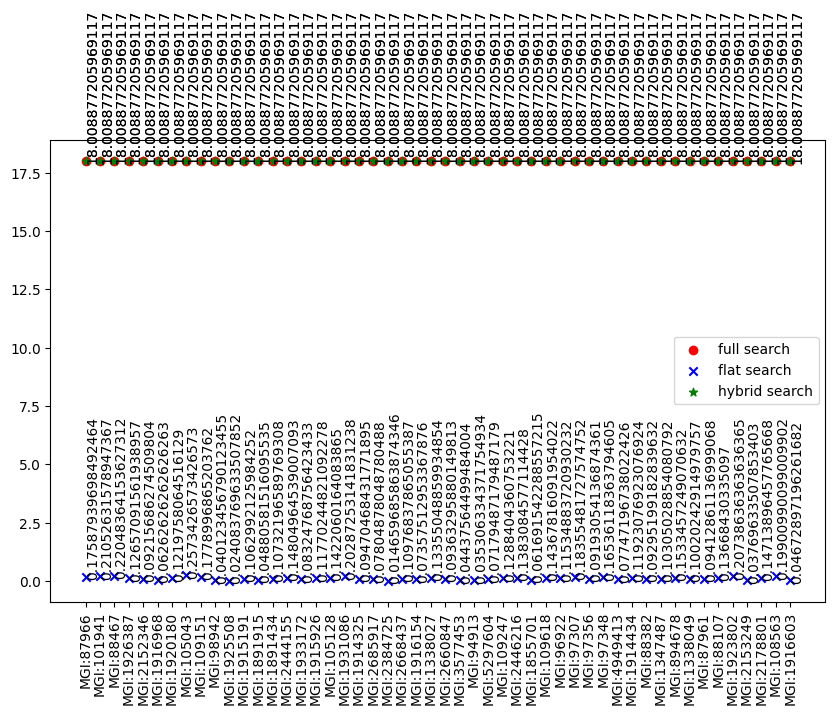

In [31]:
print("Ordered by Full search ranks")
plot_graph(full_result_score_curie_subset, full_ordered_flat_subset, full_ordered_hybrid_subset, None)

Ordered by Flat search ranks


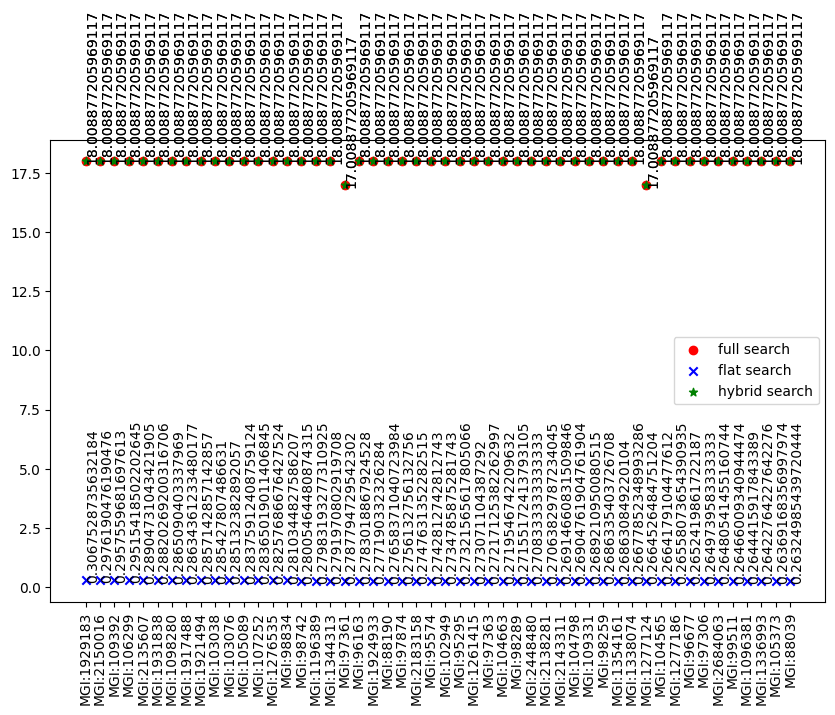

In [32]:
print( "Ordered by Flat search ranks")

plot_graph(flat_ordered_full_subset, flat_result_score_curie_subset, flat_ordered_hybrid_subset, None)

Ordered by Hybrid search ranks


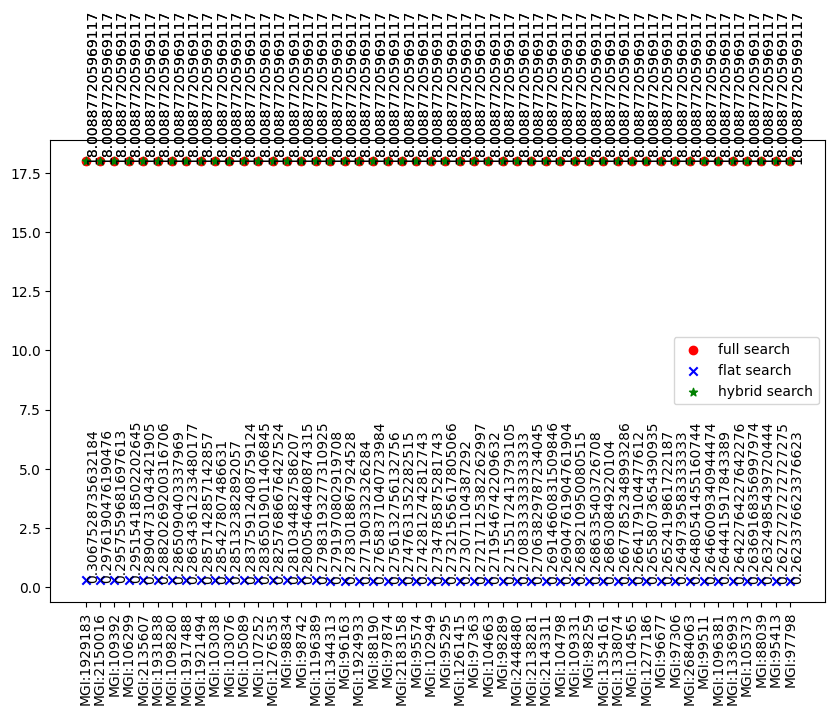

In [33]:

print("Ordered by Hybrid search ranks")
plot_graph(hybrid_ordered_full_subset, hybrid_ordered_flat_subset, hybrid_result_score_curie_subset, None)